In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
inputs = my_df.drop(['variety'], axis='columns')
target = my_df['variety']

inputs.shape, target.shape

((150, 4), (150,))

In [19]:
# The inputs dataframe consists a column called "Sex" which is not in numerical form.
# Converting str to int using labelencoder
from sklearn.preprocessing import LabelEncoder
le_variety = LabelEncoder()
target = le_variety.fit_transform(target)
target.shape

(150,)

In [20]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean' (or 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the input data
inputs = imputer.fit_transform(inputs)
inputs.shape, target.shape

((150, 4), (150,))

In [21]:
# Splitting the datasets into train and test datasets
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training sets: ", inputs_train.shape, target_train.shape)
print("Testing sets: ", inputs_test.shape, target_test.shape)

Training sets:  (120, 4) (120,)
Testing sets:  (30, 4) (30,)


In [22]:
# Build the model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [23]:
# Training the model using the training data
model.fit(inputs_train, target_train)

DecisionTreeClassifier()

In [24]:
print("Model prediction score: ", model.score(inputs_test, target_test))

Model prediction score:  0.9333333333333333


In [25]:
# Getting predicted values from the model using testing dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((30,), (30,))

Model accuracy score:  0.9333333333333333
Model precision score:  0.9351851851851851
Model f1 score:  0.9351851851851851
Model recall score:  0.9351851851851851
Model confusion matrix:  [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 11]]


Text(33.22222222222222, 0.5, 'Predicted')

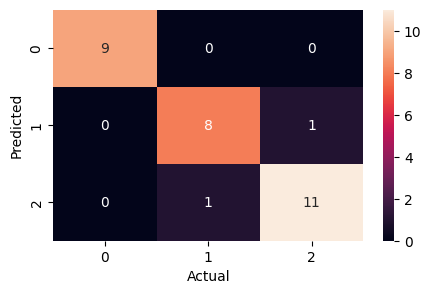

In [29]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
#print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, multi_class='ovo'))
print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")